In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import ManifoldSculpting

In [2]:
def gen_roll(n):
    data = np.zeros((n,4))
    t = np.array([2+8*i/n for i in range(n)])
    data[:,0] = t*np.sin(t)
    data[:,2] = t*np.cos(t)
    data[:,1] = np.random.uniform(-6,6,n)
    data[:,3] = t
    return data

In [3]:
data = gen_roll(1000)
roll = data[:,:3].astype(np.float32)
phi = data[:,-1]

In [4]:
importlib.reload(ManifoldSculpting)

<module 'ManifoldSculpting' from '/Users/gabrielecodega/Documents/Uni/m1/unsupervised_learning/UL_Exam/ManifoldSculpting/__init__.py'>

In [ ]:
ms = ManifoldSculpting.ManifoldSculpting(k=10,sigma=0.9,niter=200)

<string>:3: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float32, 2, 'A', False, aligned=True), Array(float32, 2, 'A', False, aligned=True))
<string>:3: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float32, 2, 'A', False, aligned=True), Array(float32, 2, 'C', False, aligned=True))


KeyboardInterrupt: 

In [ ]:
ms.niter = 200
ms.fit(roll)

In [ ]:
ms.niter = 200
ms.fit(roll)

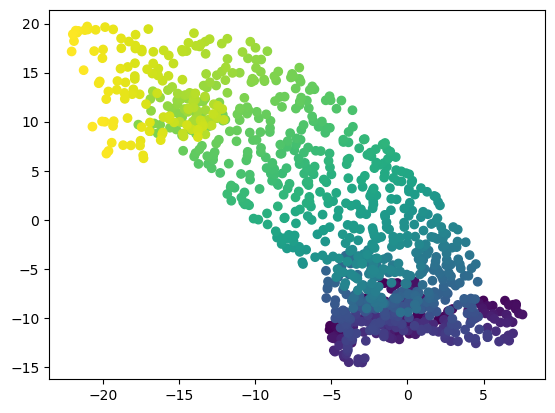

In [10]:
plt.scatter(ms.pca_data[:,0],ms.pca_data[:,1],c = phi)